In [71]:
# Welcome to the Trading Strategy - The goal of this is to design a model that when triggers levers our portfolio with a diversifying asset in order to help lower drawdown potential


In [72]:
# Currently No Access to Bloomberg - Will design to pull in data from yfinance but later will change to 

In [73]:
# Needed Packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
import yfinance as yf
import pandas as pd

def get_daily_prices(tickers, start_date, end_date):
    """
    Fetches adjusted close daily prices for a list of tickers within a specified date range.
    
    Parameters:
    tickers (list): A list of stock tickers.
    start_date (str): The start date in the format 'YYYY-MM-DD'.
    end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
    pd.DataFrame: A DataFrame where each column represents the adjusted close prices for a given ticker.
    """
    # Fetch adjusted close prices for the tickers within the specified date range
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    
    return data


start_date = '1990-01-01'
end_date = '2024-09-30'

In [75]:
# Example usage:
base_tickers = ['SPY', 'AGG']
base_prices_matrix = get_daily_prices(base_tickers, start_date, end_date)
base_prices_matrix

[*********************100%***********************]  2 of 2 completed


Ticker,AGG,SPY
Date,,
1993-01-29 00:00:00+00:00,NaN,24.608620
1993-02-01 00:00:00+00:00,NaN,24.783644
1993-02-02 00:00:00+00:00,NaN,24.836149
1993-02-03 00:00:00+00:00,NaN,25.098701
1993-02-04 00:00:00+00:00,NaN,25.203711
...,...,...
2024-09-23 00:00:00+00:00,101.132484,569.669983
2024-09-24 00:00:00+00:00,101.272064,571.299988
2024-09-25 00:00:00+00:00,100.883247,570.039978


In [76]:
gold_matrix = get_daily_prices('GLD', start_date, end_date)
gold_matrix.head(3)

[*********************100%***********************]  1 of 1 completed


Date
2004-11-18 00:00:00+00:00    44.380001
2004-11-19 00:00:00+00:00    44.779999
2004-11-22 00:00:00+00:00    44.950001
Name: Adj Close, dtype: float64

In [77]:
import pandas as pd

def calculate_moving_averages(data, windows):
    """
    Calculates moving averages for given window lengths.
    
    Parameters:
    data (pd.DataFrame or pd.Series): The time series data for gold prices.
    windows (list): List of window sizes for moving averages.
    
    Returns:
    pd.DataFrame: A DataFrame containing moving averages for each window size.
    """
    ma_df = pd.DataFrame()
    
    for window in windows:
        ma_df[f'MA_{window}'] = data.rolling(window=window).mean()
    
    return ma_df

def calculate_statistics(ma_df):
    """
    Calculates the returns, mean, standard deviation, and Sharpe ratio for each moving average.
    
    Parameters:
    ma_df (pd.DataFrame): DataFrame containing moving averages.
    
    Returns:
    pd.DataFrame: A DataFrame with mean, standard deviation, and Sharpe ratio for each moving average.
    """
    # Calculate returns for each moving average
    returns = ma_df.pct_change().dropna()
    
    # Initialize a DataFrame to store the statistics
    stats = pd.DataFrame(index=ma_df.columns)
    
    # Calculate mean, standard deviation, and Sharpe ratio for each moving average
    stats['Mean Return'] = returns.mean()
    stats['Std Dev'] = returns.std()
    stats['Sharpe Ratio'] = stats['Mean Return'] / stats['Std Dev']  # Assuming risk-free rate is 0
    
    return stats

# Example usage:
# Assuming `gold_matrix` is your DataFrame with daily gold prices
# Adjust this to point to the column or series where the gold prices are stored

windows = [3, 5, 10, 20]
gold_ma = calculate_moving_averages(gold_matrix, windows)
gold_stats = calculate_statistics(gold_ma)

print(gold_stats)


       Mean Return   Std Dev  Sharpe Ratio
MA_3      0.000367  0.006312      0.058124
MA_5      0.000358  0.004889      0.073325
MA_10     0.000347  0.003425      0.101418
MA_20     0.000339  0.002370      0.142869


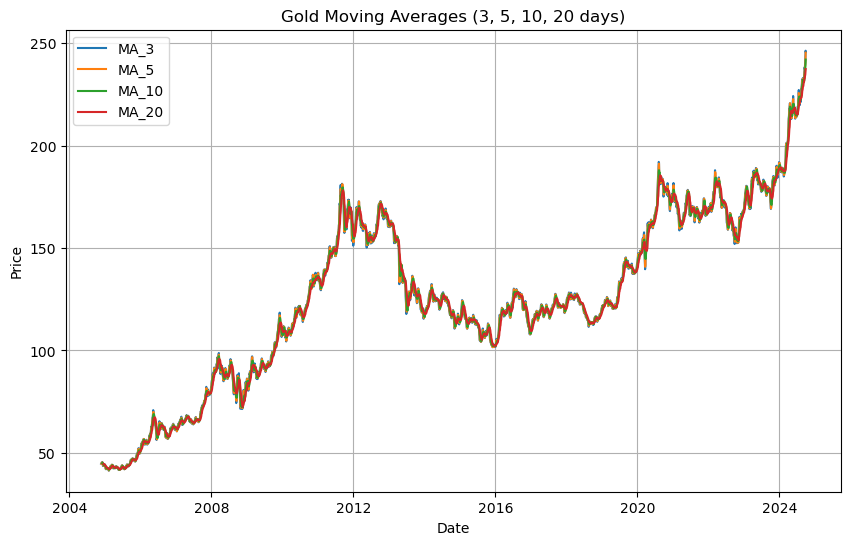

In [78]:
# Plot the moving averages for gold
plt.figure(figsize=(10, 6))

# Plot each moving average
for column in gold_ma.columns:
    plt.plot(gold_ma[column], label=column)

plt.title('Gold Moving Averages (3, 5, 10, 20 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


       Mean Return   Std Dev  Sharpe Ratio
MA_3      0.000415  0.006356      0.065231
MA_5      0.000407  0.004800      0.084704
MA_10     0.000400  0.003239      0.123509
MA_20     0.000394  0.002257      0.174785


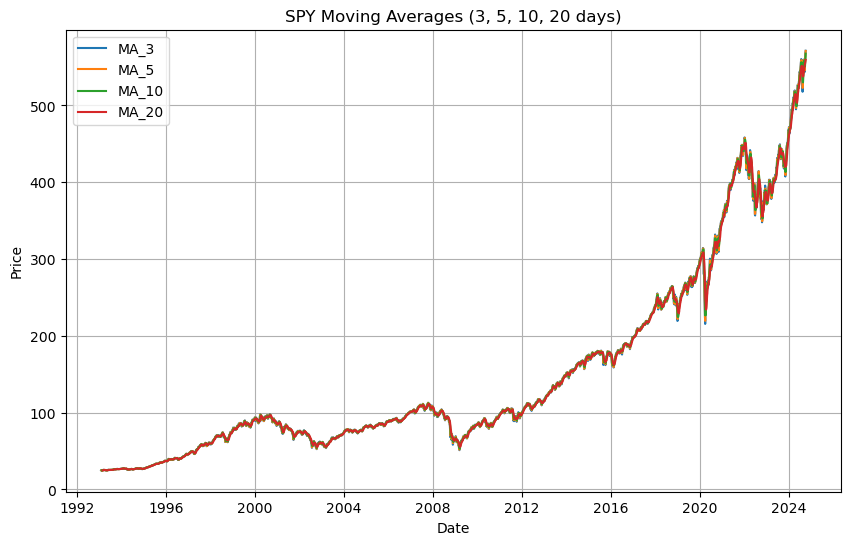

In [79]:
# Now Lets look for SPY
spy_ma = calculate_moving_averages(base_prices_matrix['SPY'], windows)
spy_stats = calculate_statistics(spy_ma)
print(spy_stats)


# Plot the moving averages for gold
plt.figure(figsize=(10, 6))

# Plot each moving average
for column in spy_ma.columns:
    plt.plot(spy_ma[column], label=column)

plt.title('SPY Moving Averages (3, 5, 10, 20 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
# Now we want to look at the ratio of gold
spy_gold_ma = spy_ma / gold_ma
spy_gold_ma

# Calculate the mean and standard deviation of the ratio itself (SPY/Gold)
spy_gold_mean = spy_gold_ma.mean()
spy_gold_std = spy_gold_ma.std()

# Create a DataFrame to display the results in table format
stats_df = pd.DataFrame({
    'Mean': spy_gold_mean,
    'Standard Deviation': spy_gold_std
})

# Print the table
print(stats_df)



           Mean  Standard Deviation
MA_3   1.567394            0.597769
MA_5   1.567145            0.597648
MA_10  1.566519            0.597354
MA_20  1.565238            0.596751


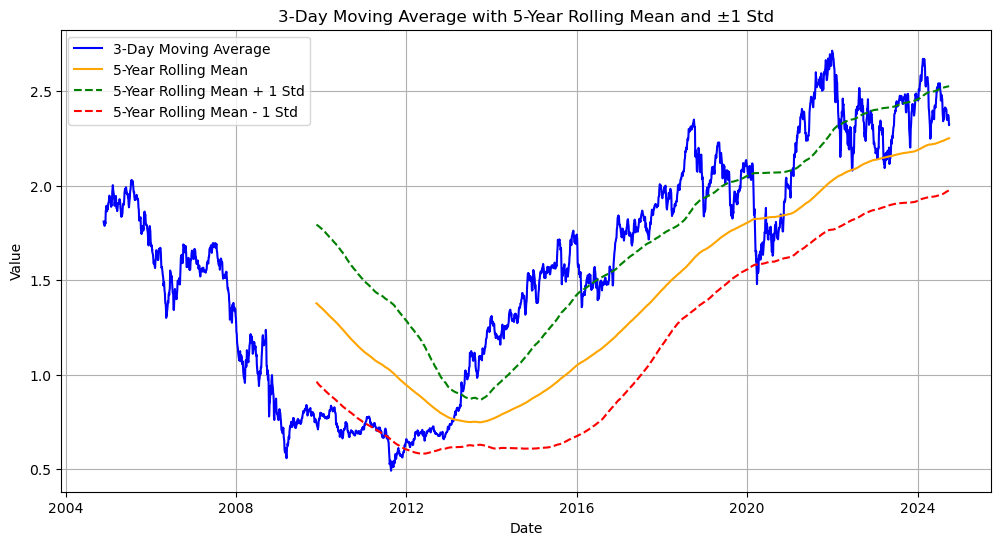

In [115]:
# Assuming `spy_gold_ma['MA_3']` contains the 3-day moving average data
ma_3 = spy_gold_ma['MA_3']

# Calculate the 10-year rolling mean and standard deviation
rolling_mean = ma_3.rolling(window=1260).mean()  # 252 trading days in a year, so 2520 for 10 years
rolling_std = ma_3.rolling(window=1260).std()

# Calculate the upper and lower bounds (mean ± 1 std)
upper_bound = rolling_mean + 1 * rolling_std
lower_bound = rolling_mean - 1 * rolling_std

# Plotting
plt.figure(figsize=(12, 6))

# Plot the 3-day moving average
plt.plot(ma_3, label='3-Day Moving Average', color='blue')

# Plot the 10-year rolling mean
plt.plot(rolling_mean, label='5-Year Rolling Mean', color='orange')

# Plot the upper and lower bounds (mean ± 1 std)
plt.plot(upper_bound, label='5-Year Rolling Mean + 1 Std', color='green', linestyle='--')
plt.plot(lower_bound, label='5-Year Rolling Mean - 1 Std', color='red', linestyle='--')

# Add title and labels
plt.title('3-Day Moving Average with 5-Year Rolling Mean and ±1 Std')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the legend
plt.legend()

# Display the grid for better readability
plt.grid(True)

# Show the plot
plt.show()


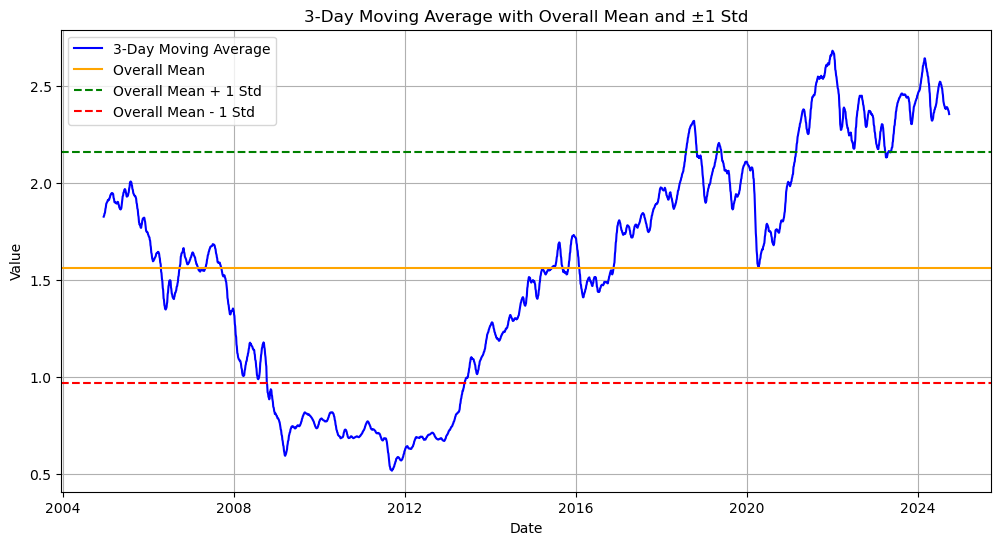

In [100]:
import matplotlib.pyplot as plt

# Assuming `spy_gold_ma['MA_3']` contains the 3-day moving average data
ma_20 = spy_gold_ma['MA_20']

# Calculate the mean and standard deviation for the entire data
overall_mean = ma_20.mean()
overall_std = ma_20.std()

# Calculate the upper and lower bounds (mean ± 1 std)
upper_bound = overall_mean + overall_std
lower_bound = overall_mean - overall_std

# Plotting
plt.figure(figsize=(12, 6))

# Plot the 3-day moving average
plt.plot(ma_20, label='3-Day Moving Average', color='blue')

# Plot the overall mean
plt.axhline(overall_mean, color='orange', label='Overall Mean')

# Plot the upper and lower bounds (mean ± 1 std)
plt.axhline(upper_bound, color='green', linestyle='--', label='Overall Mean + 1 Std')
plt.axhline(lower_bound, color='red', linestyle='--', label='Overall Mean - 1 Std')

# Add title and labels
plt.title('3-Day Moving Average with Overall Mean and ±1 Std')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the legend
plt.legend()

# Display the grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Now we will attempt to use the above

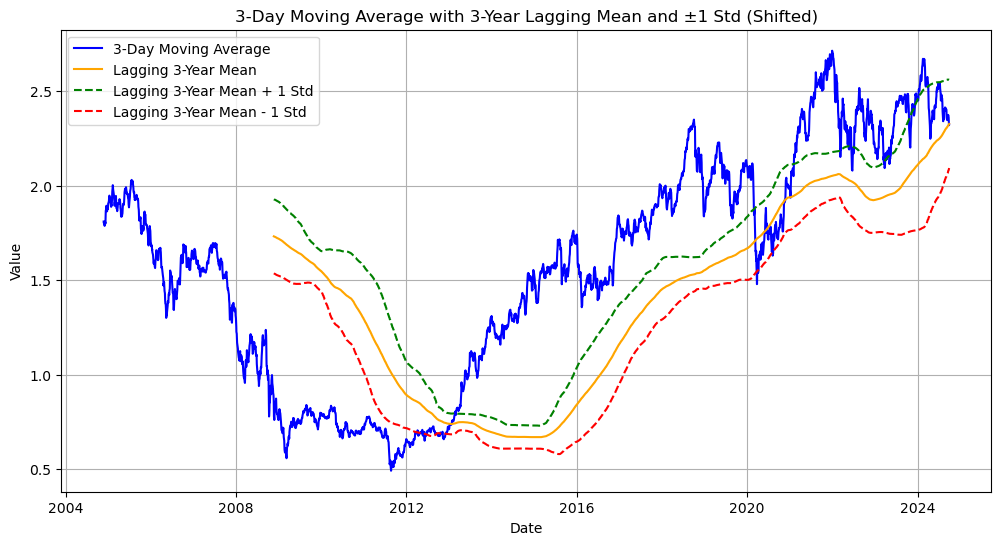

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `spy_gold_ma['MA_3']` contains the 3-day moving average data
ma_3 = spy_gold_ma['MA_3']

# Shift the data by 3 years (252 trading days per year)
shift_period = 252 * 2 # Approximate shift for 3 years
lagging_mean = ma_3.shift(shift_period).rolling(window=shift_period).mean()
lagging_std = ma_3.shift(shift_period).rolling(window=shift_period).std()

# Calculate the upper and lower bounds (mean ± 1 std)
upper_bound = lagging_mean + lagging_std
lower_bound = lagging_mean - lagging_std

# Plotting
plt.figure(figsize=(12, 6))

# Plot the 3-day moving average
plt.plot(ma_3, label='3-Day Moving Average', color='blue')

# Plot the 3-year lagging mean
plt.plot(lagging_mean, label='Lagging 3-Year Mean', color='orange')

# Plot the upper and lower bounds (mean ± 1 std)
plt.plot(upper_bound, label='Lagging 3-Year Mean + 1 Std', color='green', linestyle='--')
plt.plot(lower_bound, label='Lagging 3-Year Mean - 1 Std', color='red', linestyle='--')

# Add title and labels
plt.title('3-Day Moving Average with 3-Year Lagging Mean and ±1 Std (Shifted)')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the legend
plt.legend()

# Display the grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Lets try to implement a trading strategy

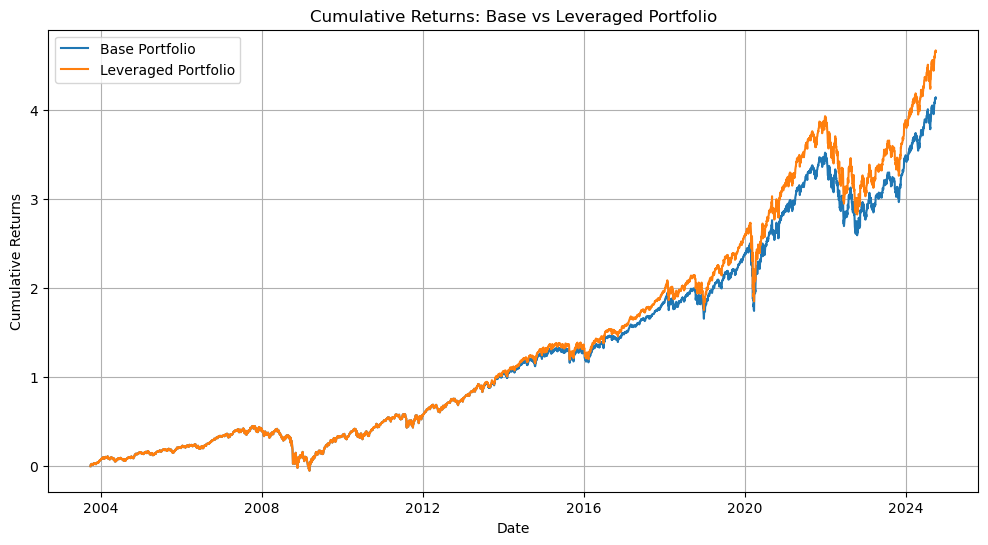

Base Portfolio: Annualized Mean=0.0845, Annualized Std=0.1139, Annualized Sharpe=0.7419, Max Drawdown=-0.3470, Peak=2007-10-09 00:00:00+00:00, Bottom=2009-03-09 00:00:00+00:00
Leveraged Portfolio: Annualized Mean=0.0898, Annualized Std=0.1193, Annualized Sharpe=0.7528, Max Drawdown=-0.3470, Peak=2007-10-09 00:00:00+00:00, Bottom=2009-03-09 00:00:00+00:00


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate daily returns for SPY and AGG
base_returns = base_prices_matrix.pct_change().dropna()

# Create the base portfolio (60% SPY, 40% AGG)
base_portfolio_returns = 0.60 * base_returns['SPY'] + 0.40 * base_returns['AGG']

# Step 2: Compute the SPY/AGG ratio and the 3-year lagging mean and std for the ratio
spy_agg_ratio = base_prices_matrix['SPY'] / base_prices_matrix['AGG']
shift_period = 252 * 3  # 3-year lag
lagging_mean = spy_agg_ratio.shift(shift_period).rolling(window=shift_period).mean()
lagging_std = spy_agg_ratio.shift(shift_period).rolling(window=shift_period).std()

# Calculate upper bound (mean + 1 std)
upper_bound = lagging_mean + lagging_std

# Step 3: Create the leveraged portfolio
leveraged_portfolio_returns = base_portfolio_returns.copy()

# Identify when the ratio exceeds 1 std
leverage_condition = spy_agg_ratio > upper_bound

# Add 10% leverage when the ratio is above 1 std
leveraged_portfolio_returns[leverage_condition] += 0.10 * base_portfolio_returns[leverage_condition]

# Step 4: Calculate cumulative returns
base_cumulative_returns = (1 + base_portfolio_returns).cumprod() - 1
leveraged_cumulative_returns = (1 + leveraged_portfolio_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(base_cumulative_returns, label='Base Portfolio')
plt.plot(leveraged_cumulative_returns, label='Leveraged Portfolio')
plt.title('Cumulative Returns: Base vs Leveraged Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Calculate drawdown using wealth index and report max drawdown, peak, and bottom

def calculate_drawdown(returns):
    """
    Calculate the drawdown, peak, and bottom dates.
    """
    wealth_index = 1000 * (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    max_drawdown = drawdowns.min()
    peak = previous_peaks[:drawdowns.idxmin()].idxmax()  # Peak before the bottom
    bottom = drawdowns.idxmin()  # Date of max drawdown
    
    return max_drawdown, peak, bottom

# Number of trading days in a year
trading_days_per_year = 252

# Performance metrics for base portfolio
base_mean_annual = base_portfolio_returns.mean() * trading_days_per_year
base_std_annual = base_portfolio_returns.std() * np.sqrt(trading_days_per_year)
base_sharpe_annual = base_mean_annual / base_std_annual  # Assume risk-free rate is 0
base_drawdown, base_peak, base_bottom = calculate_drawdown(base_portfolio_returns)

# Performance metrics for leveraged portfolio
leveraged_mean_annual = leveraged_portfolio_returns.mean() * trading_days_per_year
leveraged_std_annual = leveraged_portfolio_returns.std() * np.sqrt(trading_days_per_year)
leveraged_sharpe_annual = leveraged_mean_annual / leveraged_std_annual  # Assume risk-free rate is 0
leveraged_drawdown, leveraged_peak, leveraged_bottom = calculate_drawdown(leveraged_portfolio_returns)

# Report annualized performance metrics and drawdown details
print(f"Base Portfolio: Annualized Mean={base_mean_annual:.4f}, Annualized Std={base_std_annual:.4f}, "
      f"Annualized Sharpe={base_sharpe_annual:.4f}, Max Drawdown={base_drawdown:.4f}, "
      f"Peak={base_peak}, Bottom={base_bottom}")
print(f"Leveraged Portfolio: Annualized Mean={leveraged_mean_annual:.4f}, Annualized Std={leveraged_std_annual:.4f}, "
      f"Annualized Sharpe={leveraged_sharpe_annual:.4f}, Max Drawdown={leveraged_drawdown:.4f}, "
      f"Peak={leveraged_peak}, Bottom={leveraged_bottom}")


In [109]:
def calc_signal(df):
    """calc_signal
    simple strategy with golden cross and dead cross
    all in and all out if signal is triggered
    
    Args:
        df (pd.Dataframe): df with raw data and factors
    """

    condition1 = df['ma5'] > df['ma20']
    condition2 = df['ma5'].shift(1) <= df['ma20'].shift(1)
    df.loc[condition1 & condition2, 'signal'] = 1
    
    condition1 = df['ma5'] < df['ma20']
    condition2 = df['ma5'].shift(1) >= df['ma20'].shift(1)
    df.loc[condition1 & condition2, 'signal'] = 0

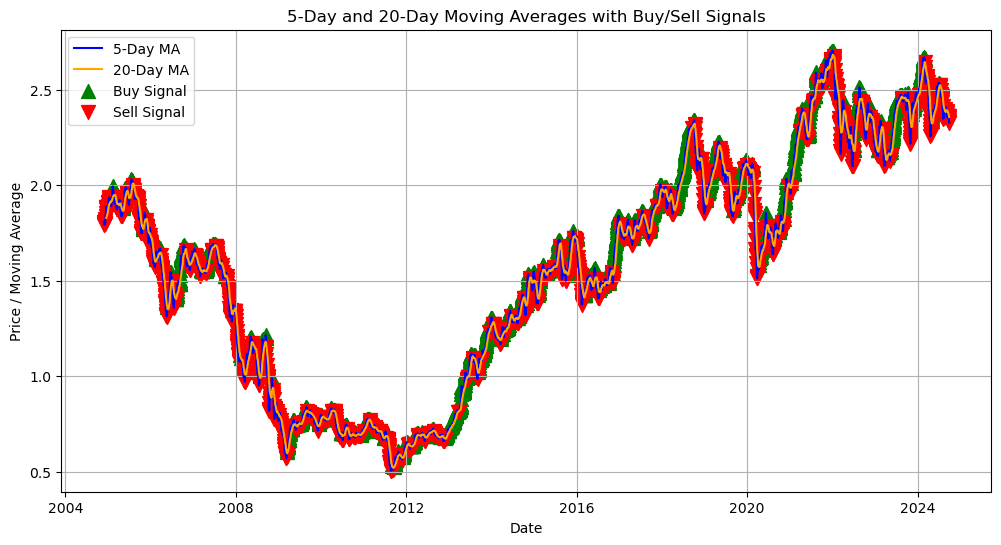

In [110]:
def calc_signal(df):
    """
    Calculate trading signals based on moving averages.
    Implements a simple strategy with golden cross and dead cross:
    - Buy signal (1) when the 5-day MA crosses above the 20-day MA (golden cross).
    - Sell signal (0) when the 5-day MA crosses below the 20-day MA (dead cross).
    
    Args:
        df (pd.DataFrame): Dataframe containing the moving averages.
    """
    # Golden cross condition (5-day MA crosses above 20-day MA)
    condition1 = df['MA_5'] > df['MA_20']
    condition2 = df['MA_5'].shift(1) <= df['MA_20'].shift(1)
    df.loc[condition1 & condition2, 'signal'] = 1
    
    # Dead cross condition (5-day MA crosses below 20-day MA)
    condition1 = df['MA_5'] < df['MA_20']
    condition2 = df['MA_5'].shift(1) >= df['MA_20'].shift(1)
    df.loc[condition1 & condition2, 'signal'] = 0
    
    # Fill the signals forward, assuming we hold positions after a signal is triggered
    df['signal'] = df['signal'].ffill().fillna(0)  # Start with no position (0)

# Applying the function to our moving averages DataFrame (assume we have 'MA_5' and 'MA_20' in gold_ma)
calc_signal(spy_gold_ma)

# Plotting the moving averages along with the buy/sell signals
plt.figure(figsize=(12, 6))

# Plot the moving averages
plt.plot(spy_gold_ma.index, spy_gold_ma['MA_5'], label='5-Day MA', color='blue')
plt.plot(spy_gold_ma.index, spy_gold_ma['MA_20'], label='20-Day MA', color='orange')

# Plot buy signals (when 'signal' = 1)
buy_signals = spy_gold_ma[spy_gold_ma['signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['MA_5'], marker='^', color='green', label='Buy Signal', s=100)

# Plot sell signals (when 'signal' = 0)
sell_signals = spy_gold_ma[spy_gold_ma['signal'] == 0]
plt.scatter(sell_signals.index, sell_signals['MA_5'], marker='v', color='red', label='Sell Signal', s=100)

# Adding title and labels
plt.title('5-Day and 20-Day Moving Averages with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price / Moving Average')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


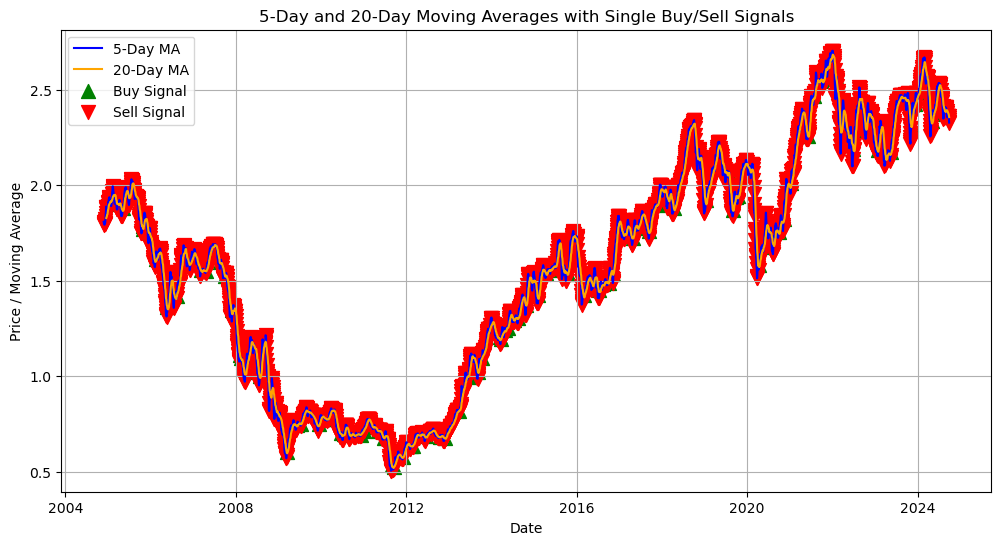

In [111]:
def calc_single_signal(df):
    """
    Calculate trading signals based on moving averages.
    Implements a strategy where we fully enter on a buy and fully exit on a sell:
    - Buy signal (1) when the 5-day MA crosses above the 20-day MA and we're not in a position.
    - Sell signal (0) when the 5-day MA crosses below the 20-day MA and we're in a position.
    
    Args:
        df (pd.DataFrame): Dataframe containing the moving averages.
    """
    df['signal'] = 0  # Default signal to 0 (not in position)

    in_position = False

    for i in range(1, len(df)):
        # Buy signal: When 5-day MA crosses above 20-day MA and we are not in a position
        if df['MA_5'].iloc[i] > df['MA_20'].iloc[i] and df['MA_5'].iloc[i-1] <= df['MA_20'].iloc[i-1] and not in_position:
            df.loc[df.index[i], 'signal'] = 1  # Buy signal
            in_position = True
        
        # Sell signal: When 5-day MA crosses below 20-day MA and we are in a position
        elif df['MA_5'].iloc[i] < df['MA_20'].iloc[i] and df['MA_5'].iloc[i-1] >= df['MA_20'].iloc[i-1] and in_position:
            df.loc[df.index[i], 'signal'] = 0  # Sell signal
            in_position = False

# Applying the function to our moving averages DataFrame (assuming we have 'MA_5' and 'MA_20' in spy_gold_ma)
calc_single_signal(spy_gold_ma)

# Plotting the moving averages along with the buy/sell signals
plt.figure(figsize=(12, 6))

# Plot the moving averages
plt.plot(spy_gold_ma.index, spy_gold_ma['MA_5'], label='5-Day MA', color='blue')
plt.plot(spy_gold_ma.index, spy_gold_ma['MA_20'], label='20-Day MA', color='orange')

# Plot buy signals (when 'signal' = 1)
buy_signals = spy_gold_ma[spy_gold_ma['signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['MA_5'], marker='^', color='green', label='Buy Signal', s=100)

# Plot sell signals (when 'signal' = 0)
sell_signals = spy_gold_ma[spy_gold_ma['signal'] == 0]
plt.scatter(sell_signals.index, sell_signals['MA_5'], marker='v', color='red', label='Sell Signal', s=100)

# Adding title and labels
plt.title('5-Day and 20-Day Moving Averages with Single Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price / Moving Average')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
